In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TIME SERIES PLOT OF BURNED AREA IN AUSTRALIA 2019

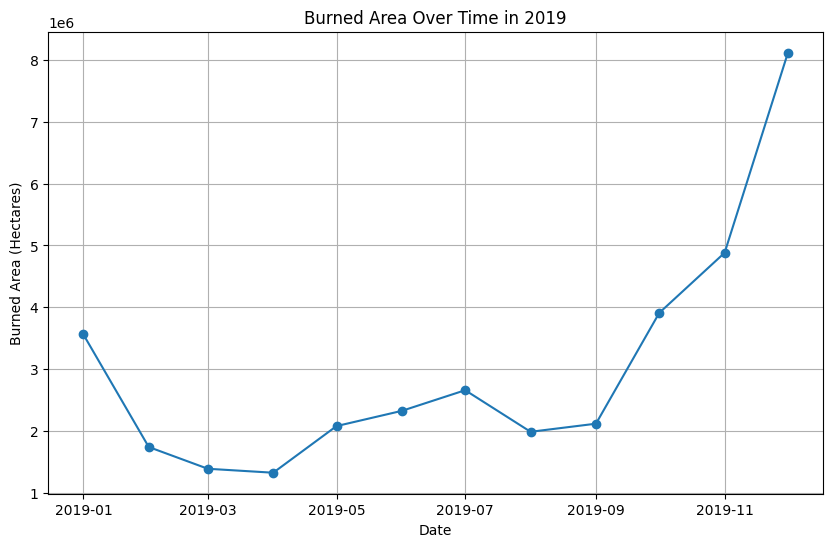

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load your CSV data
data = pd.read_csv('/content/drive/MyDrive/GEE_Exports/Burned_Area_2019.csv')

# Convert burnDate to datetime
data['burnDate'] = pd.to_datetime(data['burnDate'])

# Aggregate burned area by date
time_series = data.groupby('burnDate')['burnedAreaHectares'].sum().reset_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time_series['burnDate'], time_series['burnedAreaHectares'], marker='o')
plt.title('Burned Area Over Time in 2019')
plt.xlabel('Date')
plt.ylabel('Burned Area (Hectares)')
plt.grid(True)
plt.show()


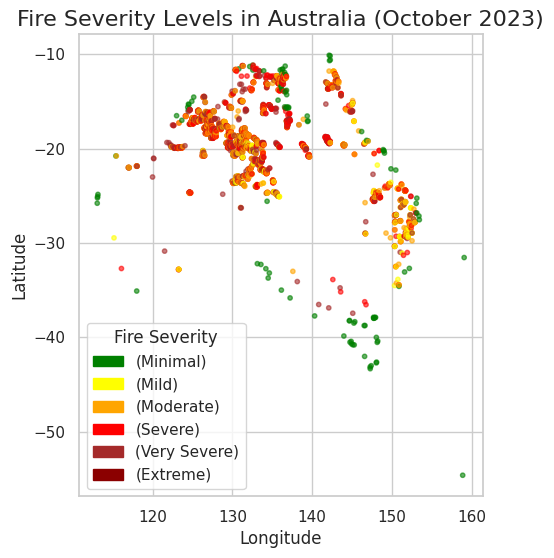

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Categorized_Fire_Points_Australia.csv')

# Create GeoDataFrame from latitude and longitude
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude),
    crs='EPSG:4326'
)

# Define color map for categories
color_map = {
    0: 'green',
    1: 'yellow',
    2: 'orange',
    3: 'red',
    4: 'brown',
    5: 'darkred'
}

# Map colors to the 'Category' column
gdf['color'] = gdf['Category'].map(color_map)

# Create legend patches to match the color map
legend_patches = [
    mpatches.Patch(color='green', label='(Minimal)'),
    mpatches.Patch(color='yellow', label='(Mild)'),
    mpatches.Patch(color='orange', label='(Moderate)'),
    mpatches.Patch(color='red', label='(Severe)'),
    mpatches.Patch(color='brown', label='(Very Severe)'),
    mpatches.Patch(color='darkred', label='(Extreme)')
]

# Plot the fire points
fig, ax = plt.subplots(figsize=(14, 6))
gdf.plot(ax=ax, color=gdf['color'], alpha=0.6, markersize=10)

# Customize the plot
plt.title('Fire Severity Levels in Australia (October 2023)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)

# Add the legend
plt.legend(handles=legend_patches, title='Fire Severity', loc='lower left')

# Display the map
plt.show()


<ipython-input-2-17c02201990b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette=colors)


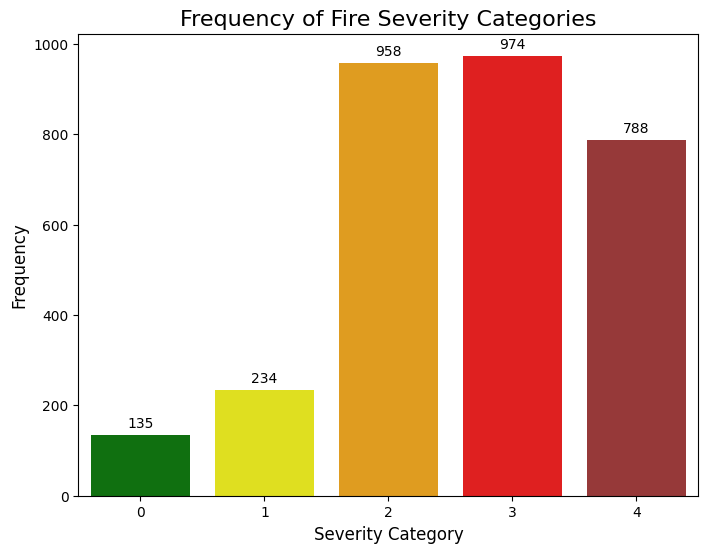

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/Categorized_Fire_Points_Australia.csv')

# Count the frequency of each category
category_counts = df['Category'].value_counts().sort_index()

# Define a color palette matching the fire severity categories
color_map = {
    0: 'green',
    1: 'yellow',
    2: 'orange',
    3: 'red',
    4: 'brown',
    5: 'darkred'
}

# Extract colors for the categories present in the data
colors = [color_map.get(cat, 'gray') for cat in category_counts.index]

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette=colors)

# Customize the plot
plt.title('Frequency of Fire Severity Categories', fontsize=16)
plt.xlabel('Severity Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the values on top of the bars
for i, value in enumerate(category_counts.values):
    plt.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


HEAT MAPS

DataFrame Head:
   system:index  Burn   latitude   longitude  \
0             0     0 -24.714899  145.363133   
1             1     0 -26.475597  132.153407   
2             2     0 -24.431930  123.758651   
3             3     0 -29.857754  132.095017   
4             4     0 -31.582520  121.813798   

                                                .geo  
0  {"geodesic":false,"type":"Point","coordinates"...  
1  {"geodesic":false,"type":"Point","coordinates"...  
2  {"geodesic":false,"type":"Point","coordinates"...  
3  {"geodesic":false,"type":"Point","coordinates"...  
4  {"geodesic":false,"type":"Point","coordinates"...  


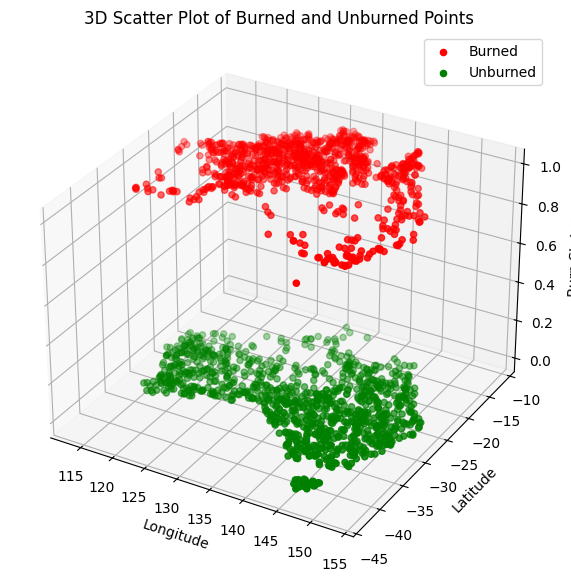

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the CSV file containing the burned points
file_path = '/content/drive/My Drive/GEE_Exports/Burned_sampled_points_Aus_with_coords.csv'
data = pd.read_csv(file_path)

# Inspect the DataFrame
print("DataFrame Head:")
print(data.head())

# Separate the columns
latitude = data['latitude']
longitude = data['longitude']
burn = data['Burn']

# Create a 3D scatter plot using matplotlib
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot burned points (Burn == 1) in red
ax.scatter(longitude[burn == 1], latitude[burn == 1], burn[burn == 1], c='red', label='Burned', s=20)

# Plot unburned points (Burn == 0) in green
ax.scatter(longitude[burn == 0], latitude[burn == 0], burn[burn == 0], c='green', label='Unburned', s=20)

# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Burn Status')

ax.set_title('3D Scatter Plot of Burned and Unburned Points')

# Add legend
ax.legend()

# Show the plot
plt.show()



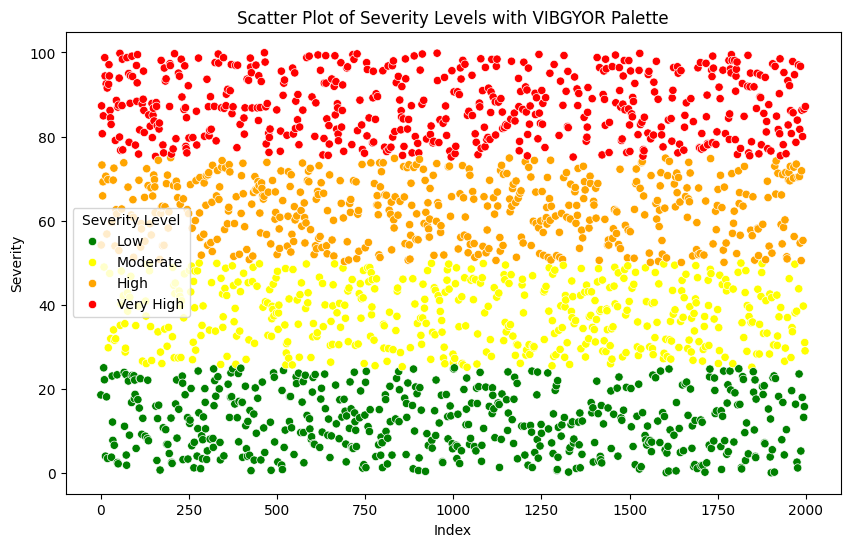

In [ ]:
# Sample Data (2000 entries)
np.random.seed(42)
data = pd.DataFrame({
    'Burn': np.random.randint(0, 2, size=2000),  # 0 for Unburned, 1 for Burned
    'Severity': np.random.rand(2000) * 100  # Random severity data
})

# Define severity levels (4 levels)
severity_labels = ['Low', 'Moderate', 'High', 'Very High']
data['Severity_Level'] = pd.cut(data['Severity'], bins=[0, 25, 50, 75, 100], labels=severity_labels)

# Define the VIBGYOR palette (Violet to Red)
vibgyor_palette = ['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red']

# Create a mapping from severity levels to VIBGYOR colors
severity_palette = ['green','yellow', 'orange', 'red']  # Mapping for Low, Moderate, High, Very High

# Plot scatter plot with VIBGYOR colors for each Severity_Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.index, y='Severity', hue='Severity_Level', data=data, palette=severity_palette)

# Customize the plot
plt.title('Scatter Plot of Severity Levels with VIBGYOR Palette')
plt.xlabel('Index')
plt.ylabel('Severity')
plt.legend(title='Severity Level')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Sample Data (2000 entries for Severity)
np.random.seed(42)
data = pd.DataFrame({
    'Severity': np.random.rand(2000) * 100  # Random severity data
})

# Define severity levels (4 levels)
severity_labels = ['Low', 'Moderate', 'High', 'Very High']
data['Severity_Level'] = pd.cut(data['Severity'], bins=[0, 25, 50, 75, 100], labels=severity_labels)

# Group by Severity Level and calculate summary statistics
statistics = data.groupby('Severity_Level')['Severity'].describe()

# Print the summary statistics for each severity level
print(statistics)


                count       mean       std        min        25%        50%  \
Severity_Level                                                                
Low             527.0  12.370895  7.089209   0.321826   6.520397  12.138494   
Moderate        460.0  37.649397  7.170071  25.024290  31.891985  37.474160   
High            512.0  62.489675  7.063818  50.151629  56.510539  62.419345   
Very High       501.0  87.613748  7.258659  75.061475  81.176979  87.367711   

                      75%        max  
Severity_Level                        
Low             18.143689  24.966801  
Moderate        43.700676  49.888815  
High            68.614540  74.996047  
Very High       94.023024  99.971767  


<ipython-input-12-ae82783157e7>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  statistics = data.groupby('Severity_Level')['Severity'].describe()


<ipython-input-13-daa7df05c78b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, ax=axes[0, 0], palette='viridis')
<ipython-input-13-daa7df05c78b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity_Level', y='Severity', data=data, ax=axes[0, 1], palette='viridis')


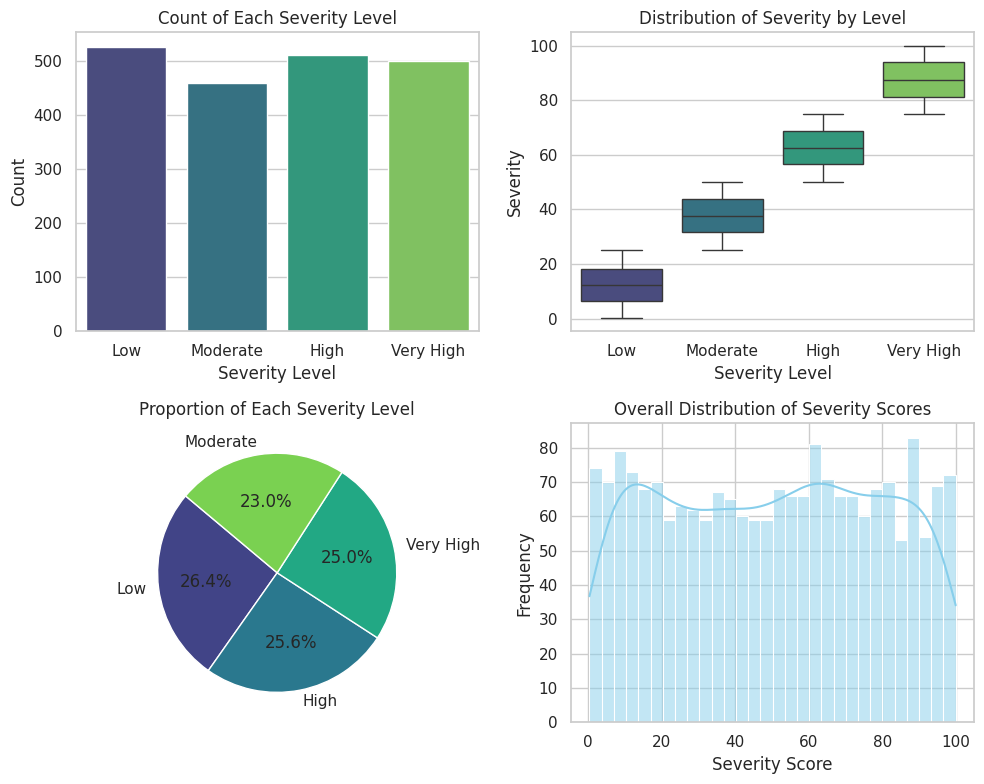

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the style for the plots
sns.set(style="whitegrid")

# Create a figure to hold the subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 1. Bar Chart: Count of each Severity Level
severity_counts = data['Severity_Level'].value_counts()
sns.barplot(x=severity_counts.index, y=severity_counts.values, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Count of Each Severity Level')
axes[0, 0].set_xlabel('Severity Level')
axes[0, 0].set_ylabel('Count')

# 2. Box Plot: Distribution of Severity within Each Level
sns.boxplot(x='Severity_Level', y='Severity', data=data, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Distribution of Severity by Level')
axes[0, 1].set_xlabel('Severity Level')
axes[0, 1].set_ylabel('Severity')

# 3. Pie Chart: Proportion of Each Severity Level
axes[1, 0].pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(severity_counts)))
axes[1, 0].set_title('Proportion of Each Severity Level')

# 4. Histogram: Overall Distribution of Severity Scores
sns.histplot(data['Severity'], bins=30, kde=True, ax=axes[1, 1], color='skyblue')
axes[1, 1].set_title('Overall Distribution of Severity Scores')
axes[1, 1].set_xlabel('Severity Score')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


**Global Forest Change**

In [ ]:
import ee
import geemap
!pip install -q earthengine-api
# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-my-rishi')

In [ ]:
# Define the region of interest (Australia)
gaul = ee.FeatureCollection('FAO/GAUL/2015/level0')
Australia = gaul.filter(ee.Filter.eq('ADM0_NAME', 'Australia'))

# Load the Hansen Global Forest Change dataset
gfc2019 = ee.Image('UMD/hansen/global_forest_change_2023_v1_11')

# Select the 'loss' and 'lossyear' bands
forestLoss = gfc2019.select(['loss'])
lossYear = gfc2019.select(['lossyear'])

# Define the period of interest
startYear = 2000
endYear = 2022

# Iterate over each year to calculate the loss
for year in range(startYear, endYear + 1):
    # Filter the dataset for the current year
    forestLossForYear = forestLoss.updateMask(lossYear.eq(year - 2000))

    # Calculate the area of forest loss for the current year in square meters
    forestLossArea = forestLossForYear.multiply(ee.Image.pixelArea())

    # Reduce the region to get the total forest loss area within Australia for the current year
    stats = forestLossArea.reduceRegion(
        reducer=ee.Reducer.sum(),
        geometry=Australia.geometry(),
        scale=1000,
        maxPixels=1e8
    )

    # Get the total forest loss area in hectares
    totalLossAreaHa = ee.Number(stats.get('loss')).divide(1e4) # from m^2 to ha

    # Print the total forest loss area for the current year
    print(f'Total forest loss area in Australia in {year} (ha):', totalLossAreaHa.getInfo())


Total forest loss area in Australia in 2000 (ha): 0
Total forest loss area in Australia in 2001 (ha): 1281617.6342109558
Total forest loss area in Australia in 2002 (ha): 725183.1518295098
Total forest loss area in Australia in 2003 (ha): 1370562.1542828921
Total forest loss area in Australia in 2004 (ha): 361490.2792230392
Total forest loss area in Australia in 2005 (ha): 1090416.5738993627
Total forest loss area in Australia in 2006 (ha): 589360.8861822059
Total forest loss area in Australia in 2007 (ha): 872463.1147226717
Total forest loss area in Australia in 2008 (ha): 494385.2025053921
Total forest loss area in Australia in 2009 (ha): 441599.1143681863
Total forest loss area in Australia in 2010 (ha): 656862.2898983334
Total forest loss area in Australia in 2011 (ha): 236019.3188310049
Total forest loss area in Australia in 2012 (ha): 247410.05989073528
Total forest loss area in Australia in 2013 (ha): 539499.1606727698
Total forest loss area in Australia in 2014 (ha): 758634.440